### Ridge Regression - L2 regularization

#### 1. Numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# function to read data and get features and labels
# arguments: file name and split ratio
# return values: features and labels of train and test
def readData (file, train):
    data = pd.read_csv (file)
    trainsize = int (0.8 * len (data))
    trainData = data.iloc [:trainsize, :].values
    testData = data.iloc [trainsize:, :].values
    return trainData [:, :-1], trainData [:, -1], testData [:, :-1], testData [:, -1]

In [3]:
# function to normalize data
# arguments: data
# return values: normalized data
def normalize (data):
    mins = np.min (data, axis = 0)
    maxs = np.max (data, axis = 0)
    return (data - mins)/ (maxs- mins)

In [4]:
# function to get polynomial features
# arguments: trainX, testX
# return values: polynomial trainX and testX
def getPolynomials (trainX, testX, degree = 3):
    features = np.append (trainX, testX)
    features = features.reshape (len (features), 1)
    for i in range (2, degree + 1):
        features = np.append (features, features [:, 0].reshape (len (features [:, 0]), 1) ** i, axis = 1)
    features = normalize (features)
    features = np.append (features, np.ones ((features.shape [0], 1)), axis = 1)
    return features [:len (trainX), ], features [len (trainX):, ]

In [5]:
# forward pass
# arguments: features, weights matrix - last term is bias
# return values: X * weights
def forwardPass (X, weights):
    return np.dot (X, weights)

In [6]:
# cost function - mean squared error
# arguments: predicted values of y, actual y
# return values: cost
def costCalculator (yhat, Y):
    return (1/ (2 * len (yhat))) * np.sum ((yhat - Y) ** 2)

In [7]:
# l2/ regularized cost function - mean squared error
# arguments: predicted values of y, actual y
# return values: regularized cost
def regCostCalculator (yhat, Y, weights, lamda):
    return (1/ (2 * len (yhat))) * (np.sum ((yhat - Y) ** 2 + lamda * np.sum (weights ** 2)))

In [8]:
# gradient descent algorithm
# arguments: X, Y, learning rate and iterations
# return value: weight and costs
def gradientDescent (X, Y, learningRate, iterations):
    weights = np.zeros ([X.shape [1]])
    costs = []
    for _ in range (iterations):
        yhat = forwardPass (X, weights)
        cost = costCalculator (yhat, Y)
        costs.append (cost)
        weights = weights - ((learningRate/ len (X)) * (np.dot ((yhat - Y), X)))
    return weights, costs

In [9]:
# regularized/ l2 gradient descent algorithm
# arguments: X, Y, learning rate and iterations
# return value: weight and costs
def regGradientDescent (X, Y, learningRate, iterations, lamda):
    weights = np.zeros ([X.shape [1]])
    costs = []
    for _ in range (iterations):
        yhat = forwardPass (X, weights)
        cost = regCostCalculator (yhat, Y, weights, lamda)
        costs.append (cost)
        weights = weights - ((learningRate/ len (X)) * ((np.dot (yhat - Y, X)) + (lamda * weights)))
    return weights, costs

In [10]:
def plotLinearReg (X, Y, polyX, weight):
    yhat = forwardPass (polyX, weight)
    plt.scatter (X, Y)
    plt.plot (X, yhat)
    plt.xlabel ('Experience in years')
    plt.ylabel ('Salary')
    plt.show ()

In [11]:
def poly (file, split = 0.8, learningRate = 0.1, iterations = 10000, degree = 3):
    trainX, trainY, testX, testY = readData (file, split)
    polyTrainX, polyTestX = getPolynomials (trainX, testX, degree)
    weights, costs = gradientDescent (polyTrainX, trainY, learningRate, iterations)
    
    # last value is the bias
    print  ("Weights: "  + str (weights))
    
    # calculate the cost on trained data
    numpyModelCost = costCalculator (forwardPass (polyTrainX, weights), trainY)
    print ("Cost: " + str (numpyModelCost))
    
    # calculate the cost on test data
    numpyModelCostTest = costCalculator (forwardPass (polyTestX, weights), testY)
    print ("Cost: " + str (numpyModelCostTest))
    
    plotLinearReg (trainX, trainY, polyTrainX, weights)

In [12]:
def polyRegularized (file, split = 0.8, learningRate = 0.1, iterations = 10000, degree = 3, lamda = 3):
    trainX, trainY, testX, testY = readData (file, split)
    polyTrainX, polyTestX = getPolynomials (trainX, testX, degree)
    weights, costs = regGradientDescent (polyTrainX, trainY, learningRate, iterations, lamda)
    
    # last value is the bias
    print  ("Weights: "  + str (weights))
    
    # calculate the cost on trained data
    numpyModelCost = costCalculator (forwardPass (polyTrainX, weights), trainY)
    print ("Cost: " + str (numpyModelCost))
    
    # calculate the cost on test data
    numpyModelCostTest = costCalculator (forwardPass (polyTestX, weights), testY)
    print ("Cost: " + str (numpyModelCostTest))
    
    plotLinearReg (trainX, trainY, polyTrainX, weights)
    plotLinearReg (testX, testY, polyTestX, weights)

Weights: [52480.50169214 37392.55867785 21826.51310604 39277.49974314]
Cost: 14309531.323900724
Cost: 221655542.70679176


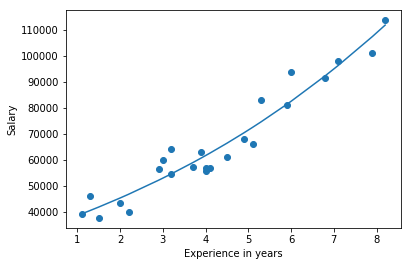

In [13]:
# degree of polynomial is 3
poly ('./Data/Salary_Data.csv')

Weights: [29597.89845399 20291.11421299 13726.57865305 45382.79353976]
Cost: 67965383.2120395
Cost: 116549789.92746033


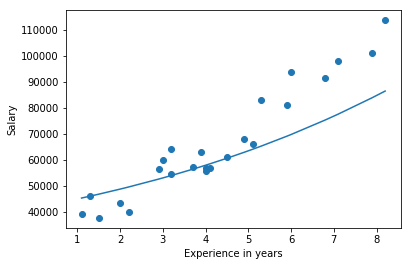

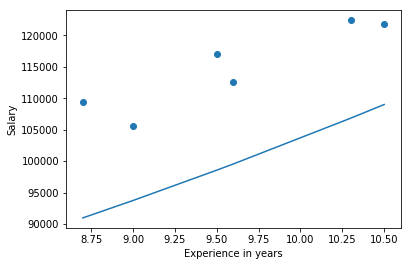

In [14]:
polyRegularized ('./Data/Salary_Data.csv')

Weights: [38777.94559548 27754.81473627 19267.32820746 44126.09487387]
Cost: 27528319.597767044
Cost: 11336013.585451886


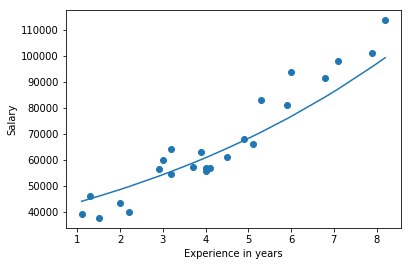

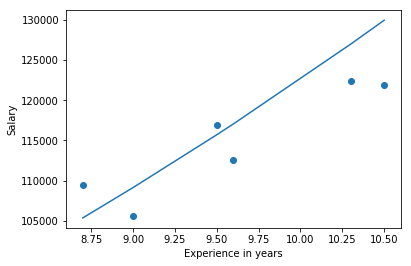

In [15]:
polyRegularized ('./Data/Salary_Data.csv', lamda = 1)

Weights: [ 5035.72367861  3076.75295567  1907.33602819 12353.19988532]
Cost: 1504094781.8954976
Cost: 4418192344.098222


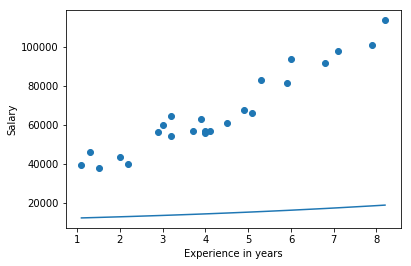

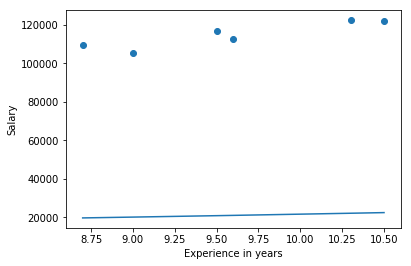

In [16]:
polyRegularized ('./Data/Salary_Data.csv', lamda = 100)

#### 2. Scikit-learn

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [18]:
def buildPolynomial (degree = 6, lamda = 0):
    
    poly = PolynomialFeatures (degree = degree)
    polyTrain = poly.fit_transform (trainX)
    polyTest = poly.transform (testX)
    
    reg = Ridge (alpha = lamda)
    reg.fit (polyTrain, trainY)
    
    trainEstimate = reg.predict (polyTrain)
    testEstimate = reg.predict (polyTest)
    
    sklearnTrainCost = costCalculator (trainEstimate, trainY)
    print ('Train data cost: ' + str (sklearnTrainCost))
    
    sklearnTestCost = costCalculator (testEstimate, testY)
    print ('Test data cost: ' + str (sklearnTestCost))
    
    plt.scatter (trainX, trainY)
    plt.plot (trainX, trainEstimate)
    plt.xlabel ('Experience in years')
    plt.ylabel ('Salary')
    plt.show ()

In [19]:
trainX, trainY, testX, testY = readData ('./Data/Salary_Data.csv', 0.8)

Train data cost: 8875051.307093954
Test data cost: 448253561045.3165


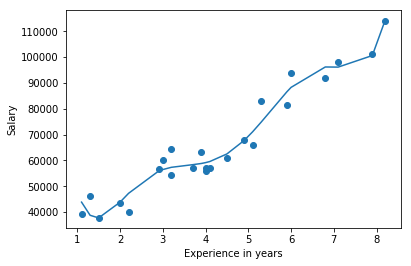

In [20]:
buildPolynomial ()

Train data cost: 13425335.093428697
Test data cost: 1932783920.6379566


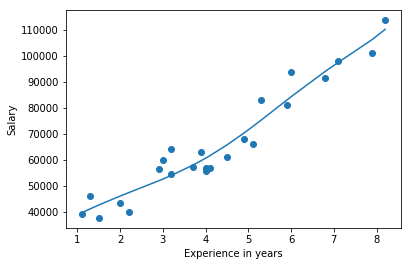

In [21]:
buildPolynomial (lamda = 0.3)

Train data cost: 13887199.510170475
Test data cost: 32190918.120471574


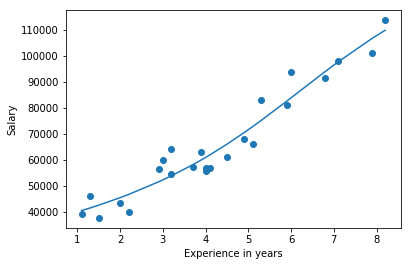

In [22]:
buildPolynomial (lamda = 1)

Train data cost: 14253978.043664306
Test data cost: 50584205.67809994


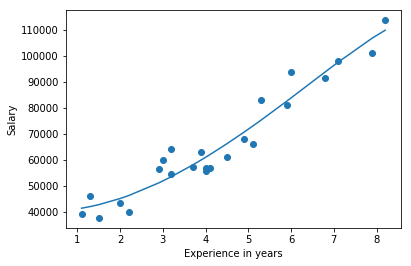

In [23]:
buildPolynomial (lamda = 10)

Train data cost: 14492774.888299968
Test data cost: 488964718.2177768


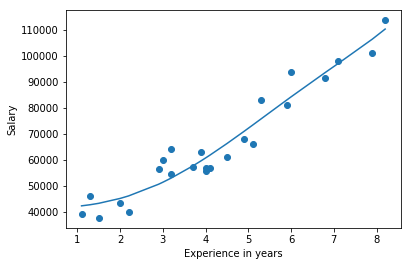

In [24]:
buildPolynomial (lamda = 50)